In [9]:
%matplotlib inline
import os, sys, glob, scipy, warnings
import scipy.stats as ss
from scipy.stats import pearsonr,spearmanr
from scipy.spatial.distance import squareform
import matplotlib, scipy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity

In [10]:
# plot configuration
%config InlineBackend.figure_formats = ["svg"]
#font_manager.fontManager.addfont(os.path.join("..", "assets", "Helvetica.ttf"))
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
pd.set_option("display.max_columns", None)
pd.set_option("show_dimensions", True)

In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5)
pd.set_option('show_dimensions', True)

In [12]:
base_dir='/Users/orlacamus/Desktop/projects/IAT240615/'

In [13]:
subList=[101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,
        134,135,136,137,138,139,140,141,142,143,144,145,146,147,149,150,151,153,154,158,160,161,163,164,165]

In [64]:
data=pd.read_csv(base_dir+'merged_data.csv',encoding='latin-1')
data=data.loc[data['subjID']>133,:]
data=data.loc[data['subjID'].isin(subList),:]
data=data.loc[data['error']==0,:]
data['event']='zero'
data.reset_index(drop=False,inplace=True)

for i in range(len(data)):
  if (data.loc[i,'condition']=='real')|(data.loc[i,'condition']=='unreal'):
    data.loc[i,'event']=data.loc[i,'condition']
  if 'ev1' in data.loc[i,'condition']:
    data.loc[i,'event']='CR'
  if 'ev2' in data.loc[i,'condition']:
    data.loc[i,'event']='CI'

data

,index,Unnamed: 0,subjID,stim,order,condition,resp_1,resp_2,response,error,resp_num,RT,init.time,distractor,ideal.y.int,maxdev,real.time,comments,timestamps,File,mt_id,mt_id.1,xpos_max,xpos_min,ypos_max,ypos_min,MAD,MAD_time,MD_above,MD_above_time,MD_below,MD_below_time,AD,AUC,xpos_flips,ypos_flips,xpos_reversals,ypos_reversals,RT.1,initiation_time,idle_time,1.timestamps,2.timestamps,3.timestamps,4.timestamps,5.timestamps,6.timestamps,7.timestamps,8.timestamps,9.timestamps,10.timestamps,11.timestamps,12.timestamps,13.timestamps,14.timestamps,15.timestamps,16.timestamps,17.timestamps,18.timestamps,19.timestamps,20.timestamps,21.timestamps,22.timestamps,23.timestamps,24.timestamps,25.timestamps,26.timestamps,27.timestamps,28.timestamps,29.timestamps,30.timestamps,31.timestamps,32.timestamps,33.timestamps,34.timestamps,35.timestamps,36.timestamps,37.timestamps,38.timestamps,39.timestamps,40.timestamps,41.timestamps,42.timestamps,43.timestamps,44.timestamps,45.timestamps,46.timestamps,47.timestamps,48.timestamps,49.timestamps,50.timestamps,51.timestamps,52.timestamps,53.timestamps,54.timestamps,55.timestamps,56.timestamps,57.timestamps,58.timestamps,59.timestamps,60.timestamps,61.timestamps,62.timestamps,63.timestamps,64.timestamps,65.timestamps,66.timestamps,67.timestamps,68.timestamps,69.timestamps,70.timestamps,71.timestamps,72.timestamps,73.timestamps,74.timestamps,75.timestamps,76.timestamps,77.timestamps,78.timestamps,79.timestamps,80.timestamps,81.timestamps,82.timestamps,83.timestamps,84.timestamps,85.timestamps,86.timestamps,87.timestamps,88.timestamps,89.timestamps,90.timestamps,91.timestamps,92.timestamps,93.timestamps,94.timestamps,95.timestamps,96.timestamps,97.timestamps,98.timestamps,99.timestamps,100.timestamps,101.timestamps,1.xpos,2.xpos,3.xpos,4.xpos,5.xpos,6.xpos,7.xpos,8.xpos,9.xpos,10.xpos,11.xpos,12.xpos,13.xpos,14.xpos,15.xpos,16.xpos,17.xpos,18.xpos,19.xpos,20.xpos,21.xpos,22.xpos,23.xpos,24.xpos,25.xpos,26.xpos,27.xpos,28.xpos,29.xpos,30.xpos,31.xpos,32.xpos,33.xpos,34.xpos,35.xpos,36.xpos,37.xpos,38.xpos,39.xpos,40.xpos,41.xpos,42.xpos,43.xpos,44.xpos,45.xpos,46.xpos,47.xpos,48.xpos,49.xpos,50.xpos,51.xpos,52.xpos,53.xpos,54.xpos,55.xpos,56.xpos,57.xpos,58.xpos,59.xpos,60.xpos,61.xpos,62.xpos,63.xpos,64.xpos,65.xpos,66.xpos,67.xpos,68.xpos,69.xpos,70.xpos,71.xpos,72.xpos,73.xpos,74.xpos,75.xpos,76.xpos,77.xpos,78.xpos,79.xpos,80.xpos,81.xpos,82.xpos,83.xpos,84.xpos,85.xpos,86.xpos,87.xpos,88.xpos,89.xpos,90.xpos,91.xpos,92.xpos,93.xpos,94.xpos,95.xpos,96.xpos,97.xpos,98.xpos,99.xpos,100.xpos,101.xpos,1.ypos,2.ypos,3.ypos,4.ypos,5.ypos,6.ypos,7.ypos,8.ypos,9.ypos,10.ypos,11.ypos,12.ypos,13.ypos,14.ypos,15.ypos,16.ypos,17.ypos,18.ypos,19.ypos,20.ypos,21.ypos,22.ypos,23.ypos,24.ypos,25.ypos,26.ypos,27.ypos,28.ypos,29.ypos,30.ypos,31.ypos,32.ypos,33.ypos,34.ypos,35.ypos,36.ypos,37.ypos,38.ypos,39.ypos,40.ypos,41.ypos,42.ypos,43.ypos,44.ypos,45.ypos,46.ypos,47.ypos,48.ypos,49.ypos,50.ypos,51.ypos,52.ypos,53.ypos,54.ypos,55.ypos,56.ypos,57.ypos,58.ypos,59.ypos,60.ypos,61.ypos,62.ypos,63.ypos,64.ypos,65.ypos,66.ypos,67.ypos,68.ypos,69.ypos,70.ypos,71.ypos,72.ypos,73.ypos,74.ypos,75.ypos,76.ypos,77.ypos,78.ypos,79.ypos,80.ypos,81.ypos,82.ypos,83.ypos,84.ypos,85.ypos,86.ypos,87.ypos,88.ypos,89.ypos,90.ypos,91.ypos,92.ypos,93.ypos,94.ypos,95.ypos,96.ypos,97.ypos,98.ypos,99.ypos,100.ypos,101.ypos,1.steps,2.steps,3.steps,4.steps,5.steps,6.steps,7.steps,8.steps,9.steps,10.steps,11.steps,12.steps,13.steps,14.steps,15.steps,16.steps,17.steps,18.steps,19.steps,20.steps,21.steps,22.steps,23.steps,24.steps,25.steps,26.steps,27.steps,28.steps,29.steps,30.steps,31.steps,32.steps,33.steps,34.steps,35.steps,36.steps,37.steps,38.steps,39.steps,40.steps,41.steps,42.steps,43.steps,44.steps,45.steps,46.steps,47.steps,48.steps,49.steps,50.steps,51.steps,52.steps,53.steps,54.steps,55.steps,56.steps,57.steps,58.steps,59.steps,60.steps,61.steps,62.steps,63.steps,64.steps,65.steps,66.steps,67.steps,68.steps,69.steps,70.steps,71.steps,

# visualize

In [65]:

import numpy as np

# For plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager

In [66]:
%config InlineBackend.figure_formats = ["svg"]
# minus in figure
plt.rcParams["axes.unicode_minus"]=False
# other style
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [67]:
data.run

0         congruent
1         congruent
           ...     
8359    incongruent
8360    incongruent
Name: run, Length: 8361, dtype: object

In [68]:
congruent=data.loc[data.run=='congruent',:]
incongruent=data.loc[data.run=='incongruent',:]
ev1_con=congruent.loc[(congruent.event=='real') | (congruent.event=='CR'),:]
ev2_con=congruent.loc[(congruent.event=='unreal') | (congruent.event=='CI'),:]
ev1_incon=incongruent.loc[(incongruent.event=='real') | (incongruent.event=='CR'),:]
ev2_incon=incongruent.loc[(incongruent.event=='unreal') | (incongruent.event=='CI'),:]


In [69]:
congruent.groupby('subjID').agg('mean',numeric_only=True)

,index,order,error,resp_num,RT,init.time,distractor,ideal.y.int,maxdev,timestamps,xpos_max,xpos_min,ypos_max,ypos_min,MAD,MAD_time,MD_above,MD_above_time,MD_below,MD_below_time,AD,AUC,xpos_flips,ypos_flips,xpos_reversals,ypos_reversals,RT.1,initiation_time,idle_time,1.timestamps,2.timestamps,3.timestamps,4.timestamps,5.timestamps,6.timestamps,7.timestamps,8.timestamps,9.timestamps,10.timestamps,11.timestamps,12.timestamps,13.timestamps,14.timestamps,15.timestamps,16.timestamps,17.timestamps,18.timestamps,19.timestamps,20.timestamps,21.timestamps,22.timestamps,23.timestamps,24.timestamps,25.timestamps,26.timestamps,27.timestamps,28.timestamps,29.timestamps,30.timestamps,31.timestamps,32.timestamps,33.timestamps,34.timestamps,35.timestamps,36.timestamps,37.timestamps,38.timestamps,39.timestamps,40.timestamps,41.timestamps,42.timestamps,43.timestamps,44.timestamps,45.timestamps,46.timestamps,47.timestamps,48.timestamps,49.timestamps,50.timestamps,51.timestamps,52.timestamps,53.timestamps,54.timestamps,55.timestamps,56.timestamps,57.timestamps,58.timestamps,59.timestamps,60.timestamps,61.timestamps,62.timestamps,63.timestamps,64.timestamps,65.timestamps,66.timestamps,67.timestamps,68.timestamps,69.timestamps,70.timestamps,71.timestamps,72.timestamps,73.timestamps,74.timestamps,75.timestamps,76.timestamps,77.timestamps,78.timestamps,79.timestamps,80.timestamps,81.timestamps,82.timestamps,83.timestamps,84.timestamps,85.timestamps,86.timestamps,87.timestamps,88.timestamps,89.timestamps,90.timestamps,91.timestamps,92.timestamps,93.timestamps,94.timestamps,95.timestamps,96.timestamps,97.timestamps,98.timestamps,99.timestamps,100.timestamps,101.timestamps,1.xpos,2.xpos,3.xpos,4.xpos,5.xpos,6.xpos,7.xpos,8.xpos,9.xpos,10.xpos,11.xpos,12.xpos,13.xpos,14.xpos,15.xpos,16.xpos,17.xpos,18.xpos,19.xpos,20.xpos,21.xpos,22.xpos,23.xpos,24.xpos,25.xpos,26.xpos,27.xpos,28.xpos,29.xpos,30.xpos,31.xpos,32.xpos,33.xpos,34.xpos,35.xpos,36.xpos,37.xpos,38.xpos,39.xpos,40.xpos,41.xpos,42.xpos,43.xpos,44.xpos,45.xpos,46.xpos,47.xpos,48.xpos,49.xpos,50.xpos,51.xpos,52.xpos,53.xpos,54.xpos,55.xpos,56.xpos,57.xpos,58.xpos,59.xpos,60.xpos,61.xpos,62.xpos,63.xpos,64.xpos,65.xpos,66.xpos,67.xpos,68.xpos,69.xpos,70.xpos,71.xpos,72.xpos,73.xpos,74.xpos,75.xpos,76.xpos,77.xpos,78.xpos,79.xpos,80.xpos,81.xpos,82.xpos,83.xpos,84.xpos,85.xpos,86.xpos,87.xpos,88.xpos,89.xpos,90.xpos,91.xpos,92.xpos,93.xpos,94.xpos,95.xpos,96.xpos,97.xpos,98.xpos,99.xpos,100.xpos,101.xpos,1.ypos,2.ypos,3.ypos,4.ypos,5.ypos,6.ypos,7.ypos,8.ypos,9.ypos,10.ypos,11.ypos,12.ypos,13.ypos,14.ypos,15.ypos,16.ypos,17.ypos,18.ypos,19.ypos,20.ypos,21.ypos,22.ypos,23.ypos,24.ypos,25.ypos,26.ypos,27.ypos,28.ypos,29.ypos,30.ypos,31.ypos,32.ypos,33.ypos,34.ypos,35.ypos,36.ypos,37.ypos,38.ypos,39.ypos,40.ypos,41.ypos,42.ypos,43.ypos,44.ypos,45.ypos,46.ypos,47.ypos,48.ypos,49.ypos,50.ypos,51.ypos,52.ypos,53.ypos,54.ypos,55.ypos,56.ypos,57.ypos,58.ypos,59.ypos,60.ypos,61.ypos,62.ypos,63.ypos,64.ypos,65.ypos,66.ypos,67.ypos,68.ypos,69.ypos,70.ypos,71.ypos,72.ypos,73.ypos,74.ypos,75.ypos,76.ypos,77.ypos,78.ypos,79.ypos,80.ypos,81.ypos,82.ypos,83.ypos,84.ypos,85.ypos,86.ypos,87.ypos,88.ypos,89.ypos,90.ypos,91.ypos,92.ypos,93.ypos,94.ypos,95.ypos,96.ypos,97.ypos,98.ypos,99.ypos,100.ypos,101.ypos,1.steps,2.steps,3.steps,4.steps,5.steps,6.steps,7.steps,8.steps,9.steps,10.steps,11.steps,12.steps,13.steps,14.steps,15.steps,16.steps,17.steps,18.steps,19.steps,20.steps,21.steps,22.steps,23.steps,24.steps,25.steps,26.steps,27.steps,28.steps,29.steps,30.steps,31.steps,32.steps,33.steps,34.steps,35.steps,36.steps,37.steps,38.steps,39.steps,40.steps,41.steps,42.steps,43.steps,44.steps,45.steps,46.steps,47.steps,48.steps,49.steps,50.steps,51.steps,52.steps,53.steps,54.steps,55.steps,56.steps,57.steps,58.steps,59.steps,60.steps,61.steps,62.steps,63.steps,64.steps,65.steps,66.steps,67.steps,68.steps,69.steps,70.steps,71.steps,72.steps,73.steps,74.steps,75.steps,76.steps,77.steps,78.steps,79.steps,80.steps,81.steps,82.s

In [70]:
congruent.groupby('subjID').agg('mean',numeric_only=True).reset_index(drop=True)

,index,order,error,resp_num,RT,init.time,distractor,ideal.y.int,maxdev,timestamps,xpos_max,xpos_min,ypos_max,ypos_min,MAD,MAD_time,MD_above,MD_above_time,MD_below,MD_below_time,AD,AUC,xpos_flips,ypos_flips,xpos_reversals,ypos_reversals,RT.1,initiation_time,idle_time,1.timestamps,2.timestamps,3.timestamps,4.timestamps,5.timestamps,6.timestamps,7.timestamps,8.timestamps,9.timestamps,10.timestamps,11.timestamps,12.timestamps,13.timestamps,14.timestamps,15.timestamps,16.timestamps,17.timestamps,18.timestamps,19.timestamps,20.timestamps,21.timestamps,22.timestamps,23.timestamps,24.timestamps,25.timestamps,26.timestamps,27.timestamps,28.timestamps,29.timestamps,30.timestamps,31.timestamps,32.timestamps,33.timestamps,34.timestamps,35.timestamps,36.timestamps,37.timestamps,38.timestamps,39.timestamps,40.timestamps,41.timestamps,42.timestamps,43.timestamps,44.timestamps,45.timestamps,46.timestamps,47.timestamps,48.timestamps,49.timestamps,50.timestamps,51.timestamps,52.timestamps,53.timestamps,54.timestamps,55.timestamps,56.timestamps,57.timestamps,58.timestamps,59.timestamps,60.timestamps,61.timestamps,62.timestamps,63.timestamps,64.timestamps,65.timestamps,66.timestamps,67.timestamps,68.timestamps,69.timestamps,70.timestamps,71.timestamps,72.timestamps,73.timestamps,74.timestamps,75.timestamps,76.timestamps,77.timestamps,78.timestamps,79.timestamps,80.timestamps,81.timestamps,82.timestamps,83.timestamps,84.timestamps,85.timestamps,86.timestamps,87.timestamps,88.timestamps,89.timestamps,90.timestamps,91.timestamps,92.timestamps,93.timestamps,94.timestamps,95.timestamps,96.timestamps,97.timestamps,98.timestamps,99.timestamps,100.timestamps,101.timestamps,1.xpos,2.xpos,3.xpos,4.xpos,5.xpos,6.xpos,7.xpos,8.xpos,9.xpos,10.xpos,11.xpos,12.xpos,13.xpos,14.xpos,15.xpos,16.xpos,17.xpos,18.xpos,19.xpos,20.xpos,21.xpos,22.xpos,23.xpos,24.xpos,25.xpos,26.xpos,27.xpos,28.xpos,29.xpos,30.xpos,31.xpos,32.xpos,33.xpos,34.xpos,35.xpos,36.xpos,37.xpos,38.xpos,39.xpos,40.xpos,41.xpos,42.xpos,43.xpos,44.xpos,45.xpos,46.xpos,47.xpos,48.xpos,49.xpos,50.xpos,51.xpos,52.xpos,53.xpos,54.xpos,55.xpos,56.xpos,57.xpos,58.xpos,59.xpos,60.xpos,61.xpos,62.xpos,63.xpos,64.xpos,65.xpos,66.xpos,67.xpos,68.xpos,69.xpos,70.xpos,71.xpos,72.xpos,73.xpos,74.xpos,75.xpos,76.xpos,77.xpos,78.xpos,79.xpos,80.xpos,81.xpos,82.xpos,83.xpos,84.xpos,85.xpos,86.xpos,87.xpos,88.xpos,89.xpos,90.xpos,91.xpos,92.xpos,93.xpos,94.xpos,95.xpos,96.xpos,97.xpos,98.xpos,99.xpos,100.xpos,101.xpos,1.ypos,2.ypos,3.ypos,4.ypos,5.ypos,6.ypos,7.ypos,8.ypos,9.ypos,10.ypos,11.ypos,12.ypos,13.ypos,14.ypos,15.ypos,16.ypos,17.ypos,18.ypos,19.ypos,20.ypos,21.ypos,22.ypos,23.ypos,24.ypos,25.ypos,26.ypos,27.ypos,28.ypos,29.ypos,30.ypos,31.ypos,32.ypos,33.ypos,34.ypos,35.ypos,36.ypos,37.ypos,38.ypos,39.ypos,40.ypos,41.ypos,42.ypos,43.ypos,44.ypos,45.ypos,46.ypos,47.ypos,48.ypos,49.ypos,50.ypos,51.ypos,52.ypos,53.ypos,54.ypos,55.ypos,56.ypos,57.ypos,58.ypos,59.ypos,60.ypos,61.ypos,62.ypos,63.ypos,64.ypos,65.ypos,66.ypos,67.ypos,68.ypos,69.ypos,70.ypos,71.ypos,72.ypos,73.ypos,74.ypos,75.ypos,76.ypos,77.ypos,78.ypos,79.ypos,80.ypos,81.ypos,82.ypos,83.ypos,84.ypos,85.ypos,86.ypos,87.ypos,88.ypos,89.ypos,90.ypos,91.ypos,92.ypos,93.ypos,94.ypos,95.ypos,96.ypos,97.ypos,98.ypos,99.ypos,100.ypos,101.ypos,1.steps,2.steps,3.steps,4.steps,5.steps,6.steps,7.steps,8.steps,9.steps,10.steps,11.steps,12.steps,13.steps,14.steps,15.steps,16.steps,17.steps,18.steps,19.steps,20.steps,21.steps,22.steps,23.steps,24.steps,25.steps,26.steps,27.steps,28.steps,29.steps,30.steps,31.steps,32.steps,33.steps,34.steps,35.steps,36.steps,37.steps,38.steps,39.steps,40.steps,41.steps,42.steps,43.steps,44.steps,45.steps,46.steps,47.steps,48.steps,49.steps,50.steps,51.steps,52.steps,53.steps,54.steps,55.steps,56.steps,57.steps,58.steps,59.steps,60.steps,61.steps,62.steps,63.steps,64.steps,65.steps,66.steps,67.steps,68.steps,69.steps,70.steps,71.steps,72.steps,73.steps,74.steps,75.steps,76.steps,77.steps,78.steps,79.steps,80.steps,81.steps,82.s

In [71]:
agg_congruent=congruent.groupby('subjID').agg('mean',numeric_only=True).reset_index(drop=True)
agg_incongruent=incongruent.groupby('subjID').agg('mean',numeric_only=True).reset_index(drop=True)
agg_ev1_con=ev1_con.groupby('subjID').agg('mean',numeric_only=True).reset_index(drop=True)
agg_ev2_con=ev2_con.groupby('subjID').agg('mean',numeric_only=True).reset_index(drop=True)
agg_ev1_incon=ev1_incon.groupby('subjID').agg('mean',numeric_only=True).reset_index(drop=True)
agg_ev2_incon=ev2_incon.groupby('subjID').agg('mean',numeric_only=True).reset_index(drop=True)

In [72]:
print(scipy.stats.ttest_rel(agg_incongruent.AUC,agg_congruent.AUC))
print(scipy.stats.ttest_rel(agg_incongruent.AUC,agg_congruent.AUC).confidence_interval(confidence_level=0.95))

TtestResult(statistic=2.946905698476405, pvalue=0.007037643836576034, df=24)
ConfidenceInterval(low=0.015031527440180048, high=0.0852994710801114)


In [73]:
print(scipy.stats.ttest_rel(agg_ev1_incon.AUC,agg_ev1_con.AUC))
print(scipy.stats.ttest_rel(agg_ev1_incon.AUC,agg_ev1_con.AUC).confidence_interval(confidence_level=0.95))

TtestResult(statistic=3.0951258608006924, pvalue=0.004945006782870609, df=24)
ConfidenceInterval(low=0.021097576095255553, high=0.10554696371672237)


In [74]:
print(scipy.stats.ttest_rel(agg_ev2_incon.AUC,agg_ev2_con.AUC))
print(scipy.stats.ttest_rel(agg_ev2_incon.AUC,agg_ev2_con.AUC).confidence_interval(confidence_level=0.95))

TtestResult(statistic=1.5598312670506371, pvalue=0.1318903290611223, df=24)
ConfidenceInterval(low=-0.017150656575590638, high=0.12329573150842563)


In [75]:
from scipy import stats

<Figure size 400x400 with 0 Axes>

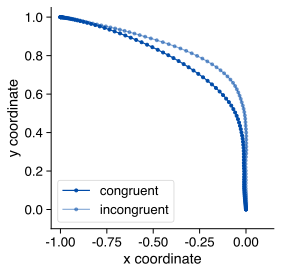

In [76]:
# plot subject level average trajectory of congruent and incongruent
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(4, 4))
plt.subplots(figsize=(4, 4))

x1=np.mean(agg_congruent.iloc[:,130:(130+101)],axis=0)
y1=np.mean(agg_congruent.iloc[:,(130+101):(130+101+101)],axis=0)

x2=np.mean(agg_incongruent.iloc[:,130:(130+101)],axis=0)
y2=np.mean(agg_incongruent.iloc[:,(130+101):(130+101+101)],axis=0)

se1=stats.sem(agg_congruent.iloc[:,(130+101):(130+101+101)],axis=0)
se2=stats.sem(agg_incongruent.iloc[:,(130+101):(130+101+101)],axis=0)

plt.plot(x1,y1, "-o", color="#004ba8", markersize=3, markeredgecolor="#004ba8", markerfacecolor="#004ba8")

plt.plot(x2,y2, "-o", color="#004ba875", markersize=3, markeredgecolor="#004ba875", markerfacecolor="#004ba875")

#plt.fill_between(x1, y1-se1, y1+se1,color='#004ba8')
#plt.fill_between(x2, y2-se2, y2+se2,color='#004ba875')

plt.legend(['congruent','incongruent'],loc="lower left")
#plt.title("enhance lie Trajectory", y=1.01)
plt.xlim((-1.05, 0.15))
plt.ylim((-.1, 1.05))
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.savefig("/Users/orlacamus/Downloads/condition_trajectory.svg", bbox_inches="tight")

In [77]:
idxmax1=agg_congruent.iloc[:,(736):(736+101)].idxmax(axis=1).tolist()
idxmax2=agg_incongruent.iloc[:,(736):(736+101)].idxmax(axis=1).tolist()
print(stats.ttest_rel([int(i[:-4]) for i in idxmax1], [int(i[:-4]) for i in idxmax2]))

TtestResult(statistic=0.07731844810126894, pvalue=0.9390112020076167, df=24)


In [78]:
y2

1.ypos      0.000000
2.ypos      0.000171
              ...   
100.ypos    1.000018
101.ypos    1.000000
Length: 101, dtype: float64

56
58
TtestResult(statistic=0.07731844810126894, pvalue=0.9390112020076167, df=24)


<Figure size 800x400 with 0 Axes>

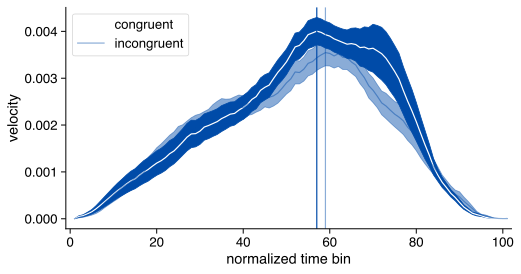

In [79]:
# plot subject level average vel for congruent and incongruent
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(8, 4))
plt.subplots(figsize=(8, 4))

x1=np.mean(agg_congruent.iloc[:,332:(332+101)],axis=0)
y1=np.mean(agg_congruent.iloc[:,(736):(736+101)],axis=0)

x2=np.mean(agg_incongruent.iloc[:,332:(332+101)],axis=0)
y2=np.mean(agg_incongruent.iloc[:,(736):(736+101)],axis=0)


se1=stats.sem(agg_congruent.iloc[:,(736):(736+101)],axis=0)
se2=stats.sem(agg_incongruent.iloc[:,(736):(736+101)],axis=0)

plt.plot(x1,y1, "-", color="white", markersize=3, markeredgecolor="white", markerfacecolor="white")

plt.plot(x2,y2, "-", color="#004ba875", markersize=3, markeredgecolor="#004ba875", markerfacecolor="#004ba875")

plt.fill_between(x1, y1-se1, y1+se1,color='#004ba8')
plt.fill_between(x2, y2-se2, y2+se2,color='#004ba875')

plt.legend(['congruent','incongruent'],loc="upper left")
#plt.title("enhance lie Trajectory", y=1.01)
plt.xlim((-1, 102))
#plt.ylim((-.1, 1.05))
plt.axvline(x=np.argmax(np.mean(agg_congruent.iloc[:,(736):(736+101)],axis=0))+1,color='#004ba8')
plt.axvline(x=np.argmax(np.mean(agg_incongruent.iloc[:,(736):(736+101)],axis=0))+1,color="#004ba875")
plt.xlabel("normalized time bin")
plt.ylabel("velocity")
plt.savefig("/Users/orlacamus/Downloads/vel_condition.svg", bbox_inches="tight")
print(np.argmax(np.mean(agg_congruent.iloc[:,(736):(736+101)],axis=0)))
print(np.argmax(np.mean(agg_incongruent.iloc[:,(736):(736+101)],axis=0)))

idxmax1=agg_congruent.iloc[:,(736):(736+101)].idxmax(axis=1).tolist()
idxmax2=agg_incongruent.iloc[:,(736):(736+101)].idxmax(axis=1).tolist()
print(stats.ttest_rel([int(i[:-4]) for i in idxmax1], [int(i[:-4]) for i in idxmax2]))

<Figure size 400x400 with 0 Axes>

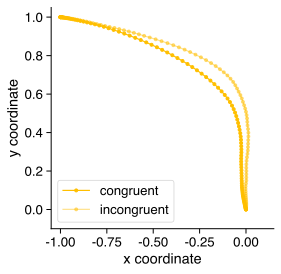

In [80]:
# plot subject level average trajectory of ev1 and ev2 (congruent)
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(4, 4))
plt.subplots(figsize=(4, 4))


x1=np.mean(agg_ev1_con.iloc[:,130:(130+101)],axis=0)
y1=np.mean(agg_ev1_con.iloc[:,(130+101):(130+101+101)],axis=0)

x2=np.mean(agg_ev1_incon.iloc[:,130:(130+101)],axis=0)
y2=np.mean(agg_ev1_incon.iloc[:,(130+101):(130+101+101)],axis=0)


plt.plot(x1,y1, "-o", color="#ffbf00", markersize=3, markeredgecolor="#ffbf00", markerfacecolor="#ffbf00")
plt.plot(x2,y2, "-o", color="#ffbf0075", markersize=3, markeredgecolor="#ffbf0075", markerfacecolor="#ffbf0075")



plt.legend(['congruent','incongruent'],loc="lower left")
#plt.title("enhance lie Trajectory", y=1.01)
plt.xlim((-1.05, 0.15))
plt.ylim((-.1, 1.05))
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.savefig("/Users/orlacamus/Downloads/ev1_trajectory.svg", bbox_inches="tight")

56
58
TtestResult(statistic=0.9567491788333947, pvalue=0.34823290762834935, df=24)


<Figure size 800x400 with 0 Axes>

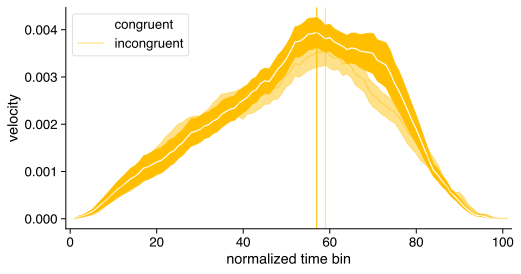

In [81]:
# plot subject level average vel for congruent and incongruent
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(8, 4))
plt.subplots(figsize=(8, 4))


x1=np.mean(agg_ev1_con.iloc[:,332:(332+101)],axis=0)
y1=np.mean(agg_ev1_con.iloc[:,(736):(736+101)],axis=0)

x2=np.mean(agg_ev1_incon.iloc[:,332:(332+101)],axis=0)
y2=np.mean(agg_ev1_incon.iloc[:,(736):(736+101)],axis=0)


se1=stats.sem(agg_ev1_con.iloc[:,(736):(736+101)],axis=0)
se2=stats.sem(agg_ev1_incon.iloc[:,(736):(736+101)],axis=0)

plt.plot(x1,y1, "-", color="white", markersize=3, markeredgecolor="white", markerfacecolor="white")

plt.plot(x2,y2, "-", color="#ffbf0075", markersize=3, markeredgecolor="#ffbf0075", markerfacecolor="#ffbf0075")

plt.fill_between(x1, y1-se1, y1+se1,color='#ffbf00')
plt.fill_between(x2, y2-se2, y2+se2,color='#ffbf0075')

plt.legend(['congruent','incongruent'],loc="upper left")
#plt.title("enhance lie Trajectory", y=1.01)
plt.xlim((-1, 102))
#plt.ylim((-.1, 1.05))
plt.axvline(x=np.argmax(np.mean(agg_ev1_con.iloc[:,(736):(736+101)],axis=0))+1,color='#ffbf00')
plt.axvline(x=np.argmax(np.mean(agg_ev1_incon.iloc[:,(736):(736+101)],axis=0))+1,color="#ffbf0075")
plt.xlabel("normalized time bin")
plt.ylabel("velocity")
plt.savefig("/Users/orlacamus/Downloads/vel_ev1.svg", bbox_inches="tight")
print(np.argmax(np.mean(agg_ev1_con.iloc[:,(736):(736+101)],axis=0)))
print(np.argmax(np.mean(agg_ev1_incon.iloc[:,(736):(736+101)],axis=0)))

idxmax1=agg_ev1_con.iloc[:,(736):(736+101)].idxmax(axis=1).tolist()
idxmax2=agg_ev1_incon.iloc[:,(736):(736+101)].idxmax(axis=1).tolist()
print(stats.ttest_rel([int(i[:-4]) for i in idxmax1], [int(i[:-4]) for i in idxmax2]))

<Figure size 400x400 with 0 Axes>

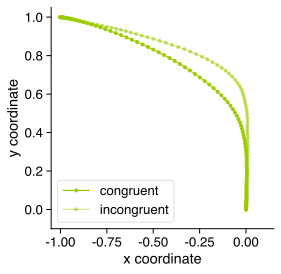

In [82]:
# plot subject level average trajectory of ev1 and ev2 (incongruent)
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(4, 4))
plt.subplots(figsize=(4, 4))




x1=np.mean(agg_ev2_con.iloc[:,130:(130+101)],axis=0)
y1=np.mean(agg_ev2_con.iloc[:,(130+101):(130+101+101)],axis=0)

x2=np.mean(agg_ev2_incon.iloc[:,130:(130+101)],axis=0)
y2=np.mean(agg_ev2_incon.iloc[:,(130+101):(130+101+101)],axis=0)


plt.plot(x1,y1, "-o", color="#9ccc00", markersize=3, markeredgecolor="#9ccc00", markerfacecolor="#9ccc00")
plt.plot(x2,y2, "-o", color="#9ccc0075", markersize=3, markeredgecolor="#9ccc0075", markerfacecolor="#9ccc0075")


plt.legend(['congruent','incongruent'],loc="lower left")
#plt.title("enhance lie Trajectory", y=1.01)
plt.xlim((-1.05, 0.15))
plt.ylim((-.1, 1.05))
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.savefig("/Users/orlacamus/Downloads/ev2_trajectory.svg", bbox_inches="tight")

57
62
TtestResult(statistic=-0.7598507826959113, pvalue=0.4547436304069772, df=24)


<Figure size 800x400 with 0 Axes>

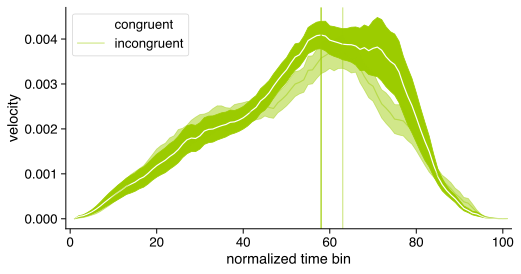

In [83]:
# plot subject level average vel for congruent and incongruent
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(8, 4))
plt.subplots(figsize=(8, 4))



x1=np.mean(agg_ev2_con.iloc[:,332:(332+101)],axis=0)
y1=np.mean(agg_ev2_con.iloc[:,(736):(736+101)],axis=0)

x2=np.mean(agg_ev2_incon.iloc[:,332:(332+101)],axis=0)
y2=np.mean(agg_ev2_incon.iloc[:,(736):(736+101)],axis=0)


se1=stats.sem(agg_ev2_con.iloc[:,(736):(736+101)],axis=0)
se2=stats.sem(agg_ev2_incon.iloc[:,(736):(736+101)],axis=0)

plt.plot(x1,y1, "-", color="white", markersize=3, markeredgecolor="white", markerfacecolor="white")

plt.plot(x2,y2, "-", color="#9ccc0075", markersize=3, markeredgecolor="#9ccc0075", markerfacecolor="#9ccc0075")

plt.fill_between(x1, y1-se1, y1+se1,color='#9ccc00')
plt.fill_between(x2, y2-se2, y2+se2,color='#9ccc0075')

plt.legend(['congruent','incongruent'],loc="upper left")
#plt.title("enhance lie Trajectory", y=1.01)
plt.xlim((-1, 102))
#plt.ylim((-.1, 1.05))
plt.axvline(x=np.argmax(np.mean(agg_ev2_con.iloc[:,(736):(736+101)],axis=0))+1,color='#9ccc00')
plt.axvline(x=np.argmax(np.mean(agg_ev2_incon.iloc[:,(736):(736+101)],axis=0))+1,color="#9ccc0075")
plt.xlabel("normalized time bin")
plt.ylabel("velocity")
plt.savefig("/Users/orlacamus/Downloads/vel_ev2.svg", bbox_inches="tight")
print(np.argmax(np.mean(agg_ev2_con.iloc[:,(736):(736+101)],axis=0)))
print(np.argmax(np.mean(agg_ev2_incon.iloc[:,(736):(736+101)],axis=0)))

idxmax1=agg_ev2_con.iloc[:,(736):(736+101)].idxmax(axis=1).tolist()
idxmax2=agg_ev2_incon.iloc[:,(736):(736+101)].idxmax(axis=1).tolist()
print(stats.ttest_rel([int(i[:-4]) for i in idxmax1], [int(i[:-4]) for i in idxmax2]))
